In [1]:
# Implementation of 3 experimental designs:
## 1. Latin hypercube 
## 2. Grid 
## 3. Uniform design

''' 
Installation: pip install --upgrade pyDOE
https://pythonhosted.org/pyDOE/randomized.html

import sys
!{sys.executable} -m pip install --upgrade pyDOE

'''

' \nInstallation: pip install --upgrade pyDOE\nhttps://pythonhosted.org/pyDOE/randomized.html\n\nimport sys\n!{sys.executable} -m pip install --upgrade pyDOE\n\n'

In [3]:
# Python imports 

import sys
!{sys.executable} -m pip install --upgrade pyDOE

import numpy as np
from matplotlib import pyplot as plt
import pyDOE as pyDOE

Requirement not upgraded as not directly required: numpy in /anaconda3/envs/tf_gpu/lib/python3.5/site-packages (from pyDOE) (1.15.2)
Requirement not upgraded as not directly required: scipy in /anaconda3/envs/tf_gpu/lib/python3.5/site-packages (from pyDOE) (1.1.0)
  Running setup.py bdist_wheel for pyDOE ... done
  Stored in directory: /Users/nramachandra/Library/Caches/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pyDOE
mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.


In [10]:
# Input parameters 

num_para = [3, 4, 5, 6, 7][0]
grid_evals = np.array([2, 3, 4, 5, 6, 7, 8])[6]
num_evals = grid_evals**num_para  ## Total number of evaluations for training the emulator (based on grid)
# num_evals = np.array([10, 100, 1000, 10000])[1]  ## Total number of evaluations (applicable for lhc and random)
design_all = ['latin', 'random', 'grid']

In [11]:
# WithRange = False

def paramsWithRange():
    # Parameters defined with ranges

    #### replace this and the limits #####
    ####  para = np.linspace(lower_lim, upper_lim, total_eval)
        
    gridpara1 = np.linspace(0.0, 0.62036, grid_evals)  #OmegaM
    gridpara2 = np.linspace(0.1841, 0.4159, grid_evals) #Omegab
    gridpara3 = np.linspace(1.2886, 2.9114, grid_evals) # sigma8

    allGrid = np.vstack([gridpara1, gridpara2, gridpara3])

    para1 = np.linspace(0.0, 0.62036, num_evals)  #OmegaM
    para2 = np.linspace(0.1841, 0.4159, num_evals) #Omegab
    para3 = np.linspace(1.2886, 2.9114, num_evals) # sigma8

    allPara = np.vstack([para1, para2, para3])
    
    return allGrid, allPara

# def Rescaledparams(num_para, grid_evals, num_evals):
def Rescaledparams(num_para, num_evals):

    ### Samples between 0-1 and rescaling will be taken care of later
    
    allPara = np.zeros(shape=(num_para, num_evals))
#     allGrid = np.zeros(shape=(num_para, grid_evals))

    for ii in range(num_para):
        allPara[ii, :] = np.linspace(0, 1, num_evals)
#         allGrid[ii, :] = np.linspace(0, 1, grid_evals) 
        
    return allPara#, allGrid


In [12]:
def gridDesign(allGridParams, paramOutDir):
    ## NEEDS TO BE CHANGED BASED ON num_para
    print(grid_evals)
    print(allGridParams.shape)
    
#     num_para = allGridParams.shape[0]
    
#     if (allGridParams.shape[1]**num_para != (num_evals) ):
#         print('grid ', allGridParams.shape[1])
#         print('num_params ', num_para)
#         print('num_evals ', num_evals)
#         print('Number of grid evaluations need to be k^num_para')
#         return None
    
    if True:
#         num_para = allGridParams.shape[0]
#         num_evals = allGridParams.shape[1]

        grd = np.array(np.meshgrid(allGridParams[0], allGridParams[1], allGridParams[2]) )

        allCombinations = np.vstack( [np.ravel(grd[0]), np.ravel(grd[1]), np.ravel(grd[2])] ).T
        
        Outfile = 'grid_para' + str(allCombinations.shape[1]) + '_total' + str(allCombinations.shape[0])
        paramOutfile = paramOutDir + Outfile + '.txt'

        print(paramOutfile)
        np.savetxt(paramOutfile, allCombinations)
        return allCombinations     

In [13]:
def latinHyp(allParams, paramOutDir):
    np.random.seed(421)
    num_para = allParams.shape[0]
    num_evals = allParams.shape[1]
    
    lhd = pyDOE.lhs(num_para, samples=num_evals, criterion=None) # c cm corr m
    # lhd = norm(loc=0, scale=1).ppf(lhd)  # this applies to both factors here
    idx = (lhd * num_evals).astype(int)

    allCombinations = np.zeros((num_evals, num_para))
    for i in range(num_para):
        allCombinations[:, i] = allParams[i][idx[:, i]]
    
    Outfile =  'latin_para' + str(num_para) + '_total' + str(num_evals)
    paramOutfile = paramOutDir + Outfile + '.txt'
    
    
    print(paramOutfile)
    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, lhd

In [14]:
def randomDesign(allParams, paramOutDir):
    ## CHECK if it's uniform in every direction
    np.random.seed(313)
    num_para = allParams.shape[0]
    num_evals = allParams.shape[1]
    
    rnd = np.random.uniform(0, 1, (num_evals, num_para) )
    
    idx = (rnd * num_evals).astype(int)
    
    allCombinations = np.zeros((num_evals, num_para))
    for i in range(num_para):
        allCombinations[:, i] = allParams[i][idx[:, i]]
        
    Outfile =  'random_para' + str(num_para) + '_total' + str(num_evals)
    paramOutfile = paramOutDir + Outfile + '.txt'

    
    print(paramOutfile)
    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, rnd

Designs/latin_para5_total100.txt


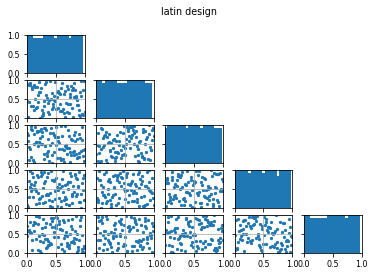

In [15]:
### Testing lhc design

design = design_all[0]   

allPara = Rescaledparams(num_para=5, num_evals= 100)
lhdParams, lhd = latinHyp(allPara,  'Designs/')
        
    
##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
            
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)

Outfile =  'latin_para' + str(num_para) + '_total' + str(num_evals)
plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

Designs/random_para5_total10.txt


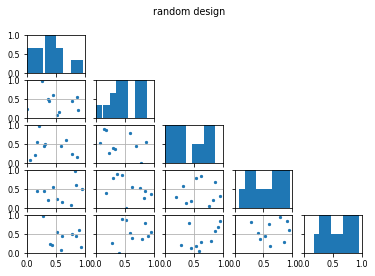

In [16]:
### testing uniform random design

design = design_all[1]
        
# Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
allPara = Rescaledparams(num_para=5, num_evals= 10)
rndParams, rnd = randomDesign(allPara,  'Designs/')

##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(rnd[:, i], rnd[:, j], s=5)
            a[i, j].grid(True)
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(rnd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)

            

Outfile =  'random_para' + str(num_para) + '_total' + str(num_evals)
plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

8
(3, 9)
Designs/grid_para3_total729.txt


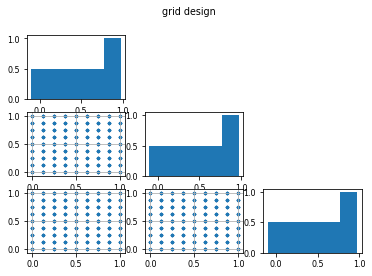

In [17]:
### testing grid design

design = design_all[2]

# num_para = 5
# num_evals = 27
# grid_evals = 4


allGrid = Rescaledparams(num_para=3, num_evals= 9)
gridParams = gridDesign(allGrid,  'Designs/')

##
f, a = plt.subplots(allGrid.shape[0], allGrid.shape[0])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allGrid.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(gridParams[:, i], gridParams[:, j], s=5)
            a[i, j].grid(True)
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(gridParams[:, i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)

## Plot looks like 9 points, but they're are coincided on the grids

Outfile = 'grid_para' + str(num_para) + '_total' + str(num_evals)
plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

In [18]:
### testing grid design

design = design_all[2]

num_para = 5
# num_evals = 27
grid_evals = 4


allGrid = Rescaledparams(num_para=num_para, num_evals= grid_evals)
gridParams = gridDesign(allGrid,  'Designs/')


4
(5, 4)
Designs/grid_para3_total64.txt


In [12]:
grid_evals

4

In [13]:
lhdParams.shape

(100, 5)

In [14]:
rndParams.shape

(10, 5)